In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [7]:
test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [5]:
train.shape

(43152, 11)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [7]:
train.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
null_counts = train.isnull().sum()
null_counts

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

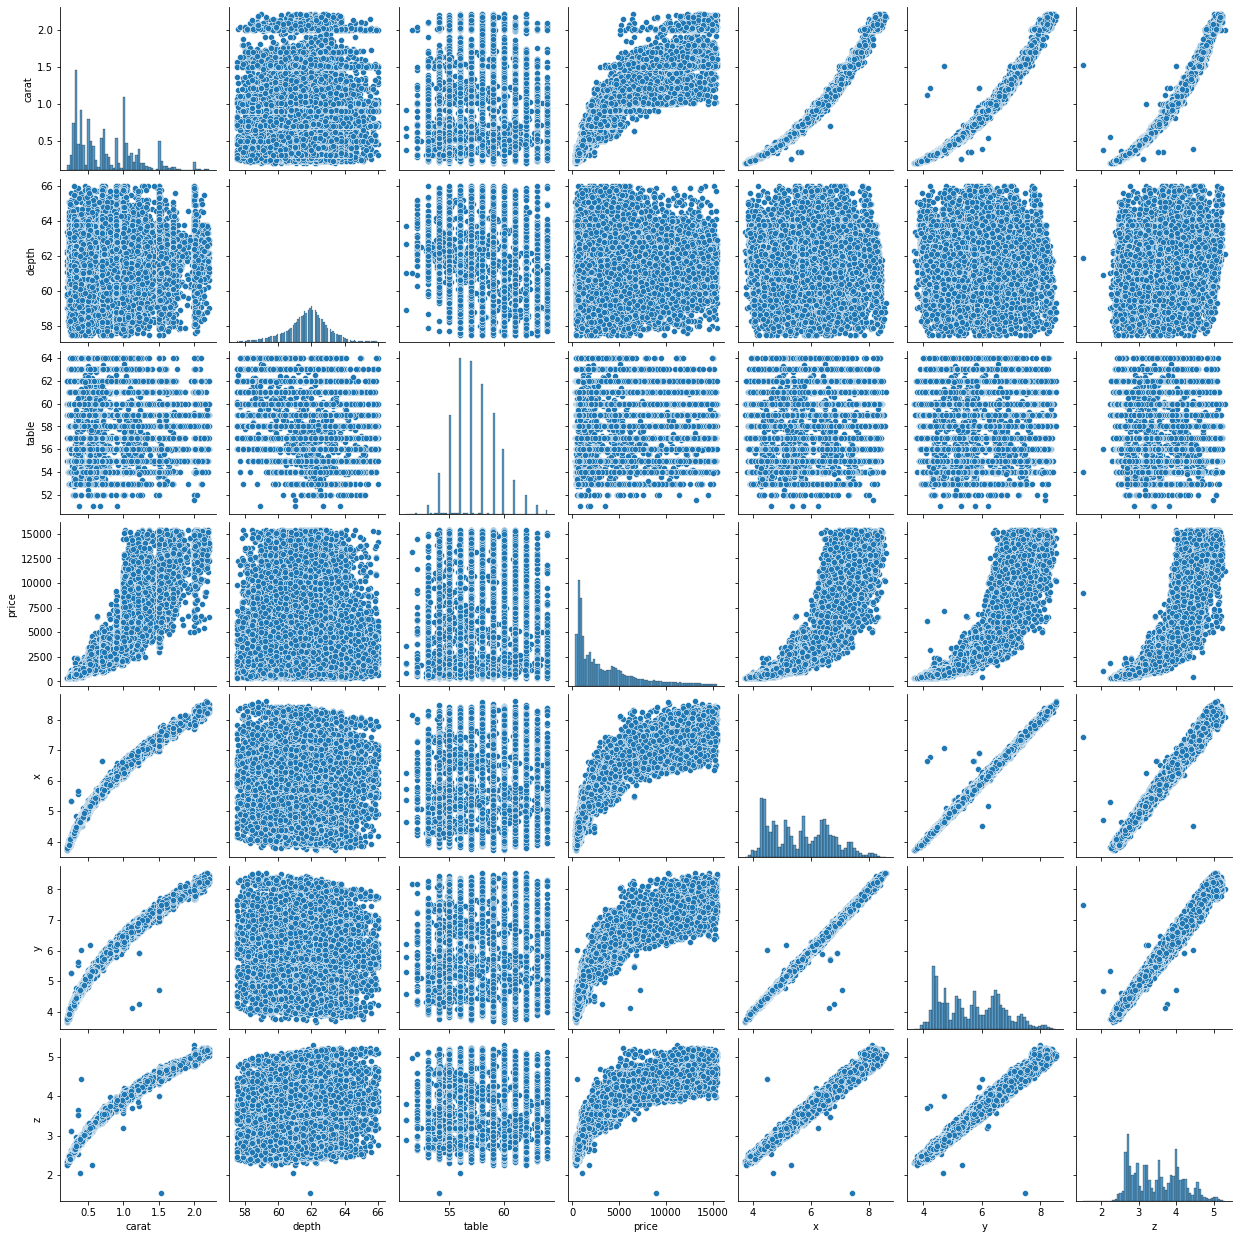

In [46]:
import seaborn as sns
train = train.drop('Id', axis=1)
sns.pairplot(train)

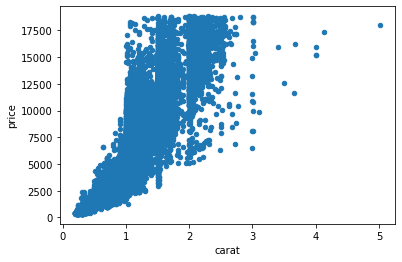

In [9]:
train.plot.scatter(x='carat',y='price')
plt.show()

<AxesSubplot:>

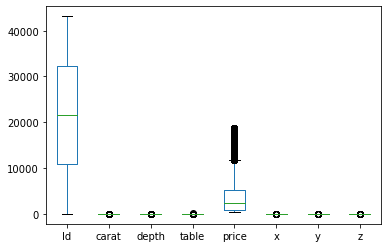

In [11]:
train.plot.box()

In [8]:
threshold = 3
X_features = ['carat','depth','table','x','y','z','price']
# Iterate over each column in the DataFrame
for column in X_features:
    # Calculate the mean and standard deviation of the column
    mean = train[column].mean()
    std = train[column].std()

    # Define the condition for identifying outliers
    condition = (train[column] > (mean + threshold * std)) | (train[column] < (mean - threshold * std))

    # Filter out rows that contain outliers for the current column
    train = train[~condition]

In [13]:
train.shape

(41127, 11)

In [9]:
X = train.drop('price', axis=1) # drop the target variable column
y = train['price']

In [15]:
y

0         4270
1        15164
2          828
3         1577
4         2596
         ...  
43147     1760
43148     3016
43149      990
43150      734
43151      743
Name: price, Length: 41127, dtype: int64

In [16]:
# Calculate the correlation matrix
correlations = X.corrwith(y)

# Print the correlation coefficients
print(correlations)

Id      -0.005202
carat    0.922250
depth   -0.003054
table    0.131198
x        0.891357
y        0.892705
z        0.888220
dtype: float64


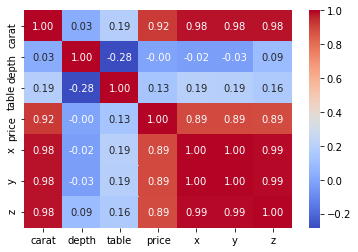

In [47]:
corr_matrix = train.corr() # calculate the correlation coefficients

# plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

In [18]:
X.shape

(41127, 10)

In [19]:
X.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,5.76,5.72,3.50


In [10]:
X = X.drop('Id',axis=1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# assume your data is stored in a numpy array called X
scaler = MinMaxScaler(feature_range=(0, 1)) # create the scaler object and specify the desired range
x_features = ['carat','depth','table','x','y','z']
from_x = X[x_features]
scaler.fit(from_x) 
X_scaled = scaler.transform(from_x)
X[x_features] = X_scaled

In [22]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.427861,Ideal,I,SI2,0.505882,0.461538,0.583162,0.602062,0.673740
1,0.651741,Premium,G,VVS2,0.400000,0.538462,0.749487,0.771134,0.790451
2,0.059701,Ideal,F,VS2,0.447059,0.384615,0.143737,0.150515,0.312997
3,0.164179,Ideal,G,VS2,0.435294,0.384615,0.299795,0.317526,0.440318
4,0.248756,Premium,H,VVS2,0.411765,0.461538,0.416838,0.420619,0.522546


In [12]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame named 'df' with three categorical columns: 'color', 'size', and 'shape'

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'color' column
X['color'] = label_encoder.fit_transform(X['color'])

# Apply label encoding to the 'size' column
X['cut'] = label_encoder.fit_transform(X['cut'])

# Apply label encoding to the 'shape' column
X['clarity'] = label_encoder.fit_transform(X['clarity'])

In [24]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.427861,2,5,3,0.505882,0.461538,0.583162,0.602062,0.673740
1,0.651741,3,3,7,0.400000,0.538462,0.749487,0.771134,0.790451
2,0.059701,2,2,5,0.447059,0.384615,0.143737,0.150515,0.312997
3,0.164179,2,3,5,0.435294,0.384615,0.299795,0.317526,0.440318
4,0.248756,3,4,7,0.411765,0.461538,0.416838,0.420619,0.522546


In [13]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# create a linear regression model object
model = LinearRegression()

In [27]:

model.fit(X_train.values, y_train)

LinearRegression()

In [28]:
print("Training score:", model.score(X_train.values, y_train))
print("testing score:", model.score(X_test.values, y_test))

Training score: 0.8907904199206413
testing score: 0.8933167527880385


In [29]:
y_pred = model.predict(X_test.values)

In [30]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = model.score(X_test.values, y_test)

#print the evaluation metrics
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Root Mean Squared Error: 1109.1319423131931
R-squared: 0.8933167527880385


In [31]:
from sklearn.tree import DecisionTreeRegressor
>>> regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train.values, y_train)
print('DecisionTreeRegressor training score is : ', regressor.score(X_train.values, y_train))
print('DecisionTreeRegressor testing score is : ', regressor.score(X_test.values, y_test))

DecisionTreeRegressor training score is :  0.9999980836206298
DecisionTreeRegressor testing score is :  0.9674849510748393


In [32]:
y_pred_regressor = regressor.predict(X_test.values)

In [33]:
mse = mean_squared_error(y_test, y_pred_regressor)
rmse = np.sqrt(mse)
r2 = regressor.score(X_test.values, y_test)

#print the evaluation metrics
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Root Mean Squared Error: 612.3183938300757
R-squared: 0.9674849510748393


In [34]:
for i in range(5):
    print(y_pred_regressor[i])

1122.0
3398.0
1144.0
738.0
1257.0


In [28]:
array = y_test.values

In [39]:
for i in range(5):
    print(array[i])

1088
3340
1012
694
1356


In [16]:
from xgboost import XGBRegressor


xgb_reg = XGBRegressor()

xgb_reg.fit(X_train.values, y_train)

print('xgboost training score is : ', xgb_reg.score(X_train.values, y_train))
print('xgboost testing score is : ', xgb_reg.score(X_test.values, y_test))

y_pred_xgb = xgb_reg.predict(X_test.values)



xgboost training score is :  0.9922884174531861
xgboost testing score is :  0.9819744902580921


In [17]:
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = xgb_reg.score(X_test.values, y_test)

#print the evaluation metrics
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Root Mean Squared Error: 455.9097470648523
R-squared: 0.9819744902580921


In [26]:
for i in range(5):
    print(y_pred_xgb[i])

1139.9037
3528.1458
1257.5907
832.60065
1317.2092


In [29]:
for i in range(5):
    print(array[i])

1088
3340
1012
694
1356


In [18]:
test = test.drop('Id', axis=1)
test.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [19]:
test.tail()

,carat,cut,color,clarity,depth,table,x,y,z
10783,0.57,Ideal,H,VS1,60.9,56.0,5.34,5.36,3.26
10784,1.05,Ideal,G,VS2,60.8,57.0,6.65,6.58,4.02
10785,0.71,Ideal,E,VVS1,62.3,55.0,5.68,5.72,3.55
10786,1.11,Premium,E,SI2,61.0,60.0,6.68,6.66,4.07
10787,2.00,Premium,F,SI2,61.5,59.0,8.03,7.95,4.92


In [20]:
# assume your data is stored in a numpy array called X
#scaler = MinMaxScaler(feature_range=(0, 1)) # create the scaler object and specify the desired range
x_features = ['carat','depth','table','x','y','z']
from_x_test = test[x_features]
X_scaled_test = scaler.transform(from_x_test) 
test[x_features] = X_scaled_test

In [21]:
test.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.069652,Ideal,G,VVS2,0.423529,0.461538,0.162218,0.164948,0.323607
1,0.253731,Premium,E,VS2,0.611765,0.538462,0.412731,0.412371,0.543767
2,0.119403,Very Good,I,VS1,0.623529,0.384615,0.225873,0.247423,0.403183
3,0.303483,Premium,E,SI2,0.305882,0.615385,0.484600,0.484536,0.562334
4,0.099502,Ideal,G,VVS1,0.435294,0.384615,0.207392,0.230928,0.368700


In [22]:
# Assuming you have a DataFrame named 'df' with three categorical columns: 'color', 'size', and 'shape'

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'color' column
test['color'] = label_encoder.fit_transform(test['color'])

# Apply label encoding to the 'size' column
test['cut'] = label_encoder.fit_transform(test['cut'])

# Apply label encoding to the 'shape' column
test['clarity'] = label_encoder.fit_transform(test['clarity'])

In [23]:
test.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.069652,2,3,7,0.423529,0.461538,0.162218,0.164948,0.323607
1,0.253731,3,1,5,0.611765,0.538462,0.412731,0.412371,0.543767
2,0.119403,4,5,4,0.623529,0.384615,0.225873,0.247423,0.403183
3,0.303483,3,1,3,0.305882,0.615385,0.484600,0.484536,0.562334
4,0.099502,2,3,6,0.435294,0.384615,0.207392,0.230928,0.368700


In [24]:
predictions = xgb_reg.predict(test)

In [25]:
print(predictions[1])

2934.1638


In [ ]:
test_2 = pd.read_csv('test.csv')
submission = test_2[['Id']]
submission
submission["price"]= predictions

In [ ]:
submission

In [ ]:
submission.to_csv('submission.csv',index=None)